# AST326 lab01
### Maxwell Fine 1004714400

Ex02: Read the two files in your Python code and calculate the mean and standard deviation
of the measurements recorded in each file (so you will have values for “Small” and “Large”
files respectively). Are they consistent with what you expect from a Poisson distribution? The difference between “Small” and “Large” is the integration time wherein the latter has a much longer integration time than the former, so larger count rates in “Large” files than “Small.”

Ex03: Plot the measurements to examine their distributions. First, you can simply plot the
measurements in sequence and then using a histogram (like Figure 1 above). These analyses
and plots need to be done separately for “Small” and “Large” measurements. By glancing the
plots, can you roughly estimate the mean and standard deviation of the two measurements?
Compare the histogram that you created for the “Small” data with what is expected from a
Poisson distribution as Figure 3 above.

In [69]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# data fname's
large_f = 'data/Fine-finemaxw-Large.txt'
small_f = 'data/Fine-finemaxw-Small.txt'

In [27]:
# load data

large_data = np.genfromtxt(fname=large_f, dtype=int)
small_data = np.genfromtxt(fname=small_f, dtype=int)

## Ex02

In [53]:
# determination if poisson distribution
# recall for Poisson distributions that std**2 = mean, in real data this is only aproxametly true

def is_poisson_mean(arr, tolerance=0.05):
    # what to use for a 'good' tolerance? 
    # less then 5% error?
    
    mean = np.mean(arr)
    std = np.std(arr)
    
    poisson_test = (mean-std**2) / mean
    
    return poisson_test
    
def is_poisson_std(arr, tolerance=0.05):
    # what to use for a 'good' tolerance? 
    # less then 5% error?
    
    mean = np.mean(arr)
    std = np.std(arr)
    
    poisson_test = (np.sqrt(mean)-std) / std
    
    return poisson_test

In [49]:
is_poisson_mean(large_data, tolerance=0.05)

True

In [58]:
is_poisson_std(small_data, tolerance=0.001)  *100

-0.7668334925077578

In [59]:
is_poisson_mean(small_data, tolerance=0.001) *100

-1.551490107688457

### depends on how we measure

what is a good value? how do we justify this? 

In [65]:
(31/1000) *100 #its less then sqrt(n) error is that resonable? 

31.622776601683793

## Ex03

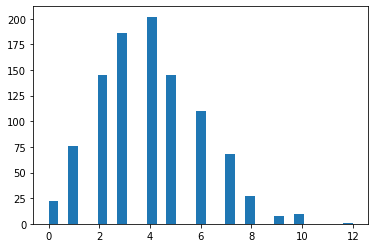

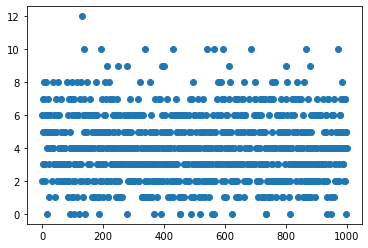

In [78]:
# make plotting function
plt.hist(small_data, bins=int(np.sqrt(len(small_data))))
plt.show()
plt.scatter(np.arange(0, len(small_data)), small_data)